In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score,roc_auc_score,r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the data file and convert into dataframe
data = pd.read_csv('Advertising[1].csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Check columns name
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
# Check number of rows and columns
data.shape

(200, 5)

There are 200 rows and 5 coloumns

In [5]:
# printing the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# finding the count of missing values from different columns
data.isna().sum() 

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

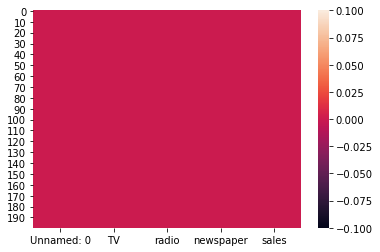

In [7]:
# Check missing value throw visualization
sns.heatmap(data.isna())
plt.show()

In [8]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

#we observe that there this no missing values

In [9]:
correaltion= data.corr()
correaltion

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


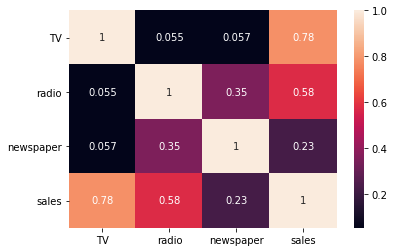

In [10]:
sns.heatmap(correaltion, annot = True)
plt.show()

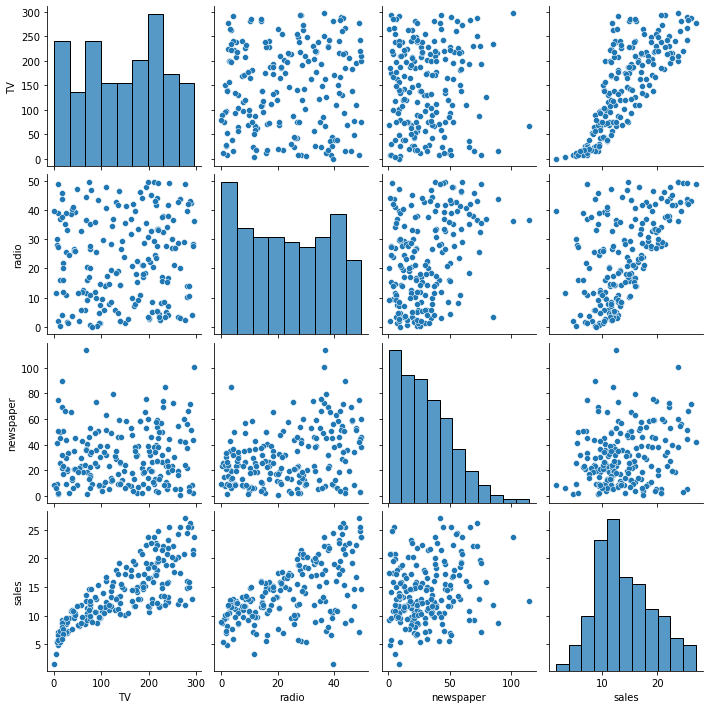

In [11]:
sns.pairplot(data)
plt.show()

Now, let's showcase the relationship between the feature and target column

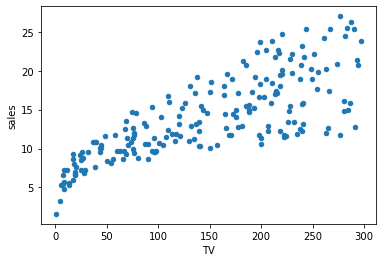

In [12]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')
plt.show()

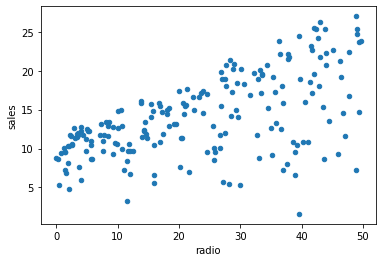

In [13]:
# second, plot the observed data
data.plot(kind='scatter', x='radio', y='sales')
plt.show()

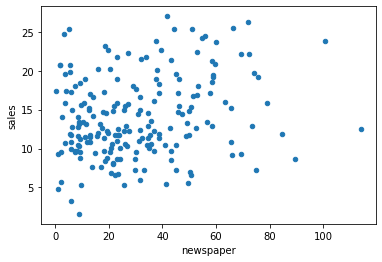

In [14]:
# third, plot the observed data
data.plot(kind='scatter', x='newspaper', y='sales')
plt.show()

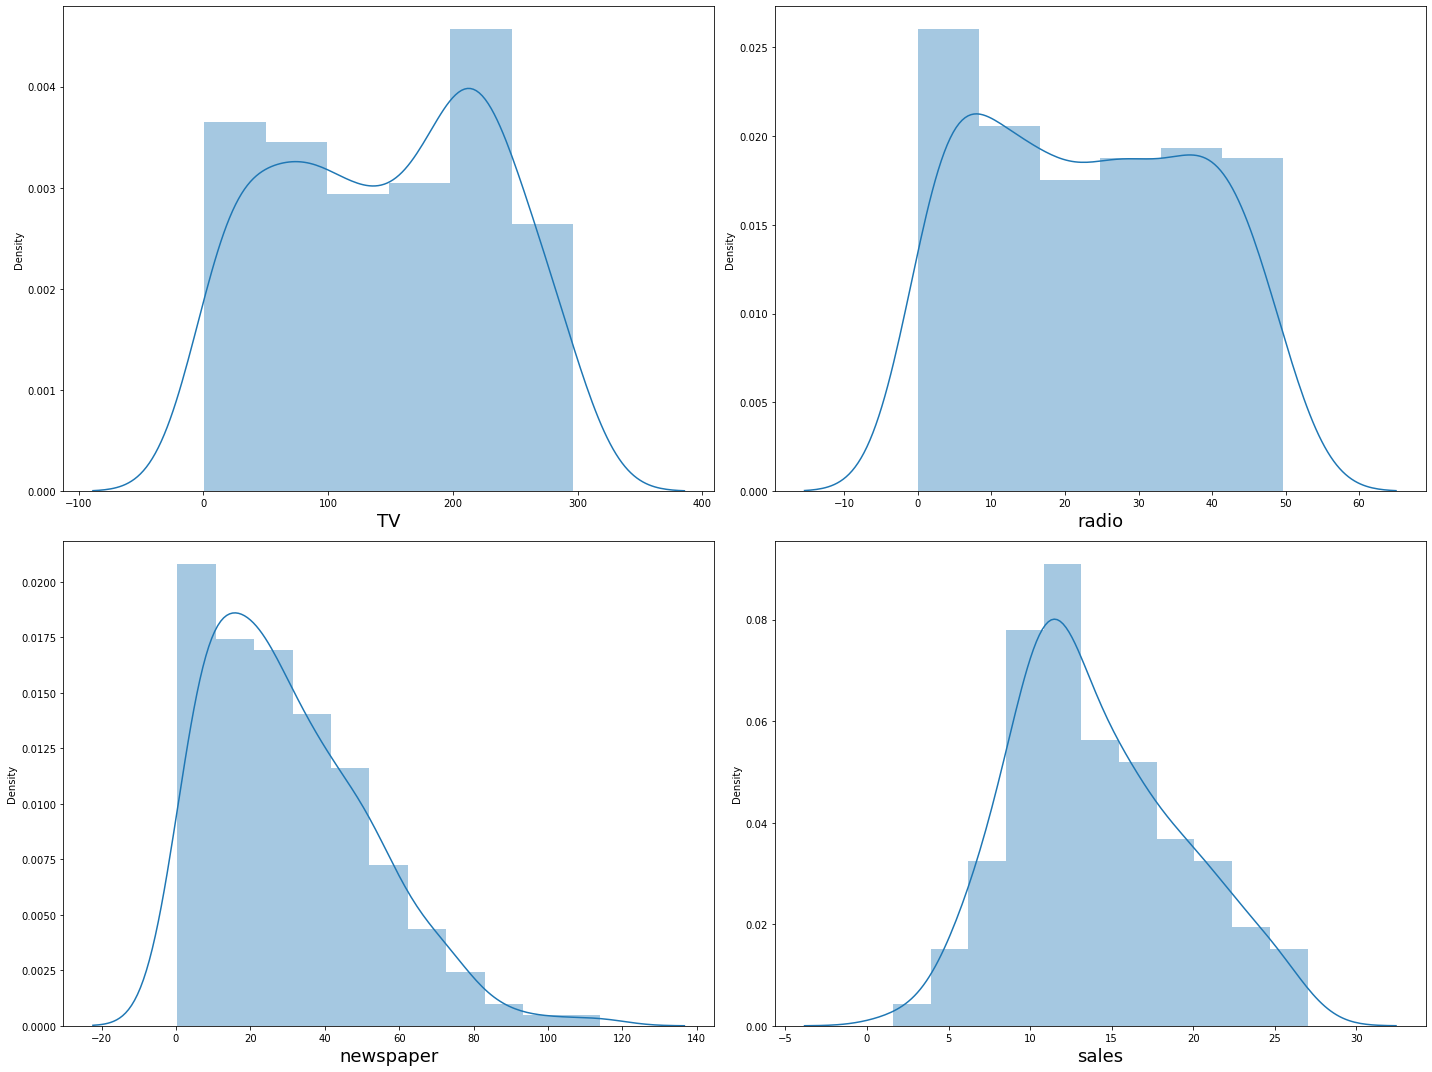

In [15]:
# Let' see how data is distributed in every columns.
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in data:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [16]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

we observed that newspaper as skewness 

In [18]:
# create X and y
X = data.drop(['sales'], axis = 1)
y = data.sales

In [19]:
from sklearn.preprocessing import power_transform
X_new =power_transform(X)
X_new=pd.DataFrame(X_new,columns= X.columns)

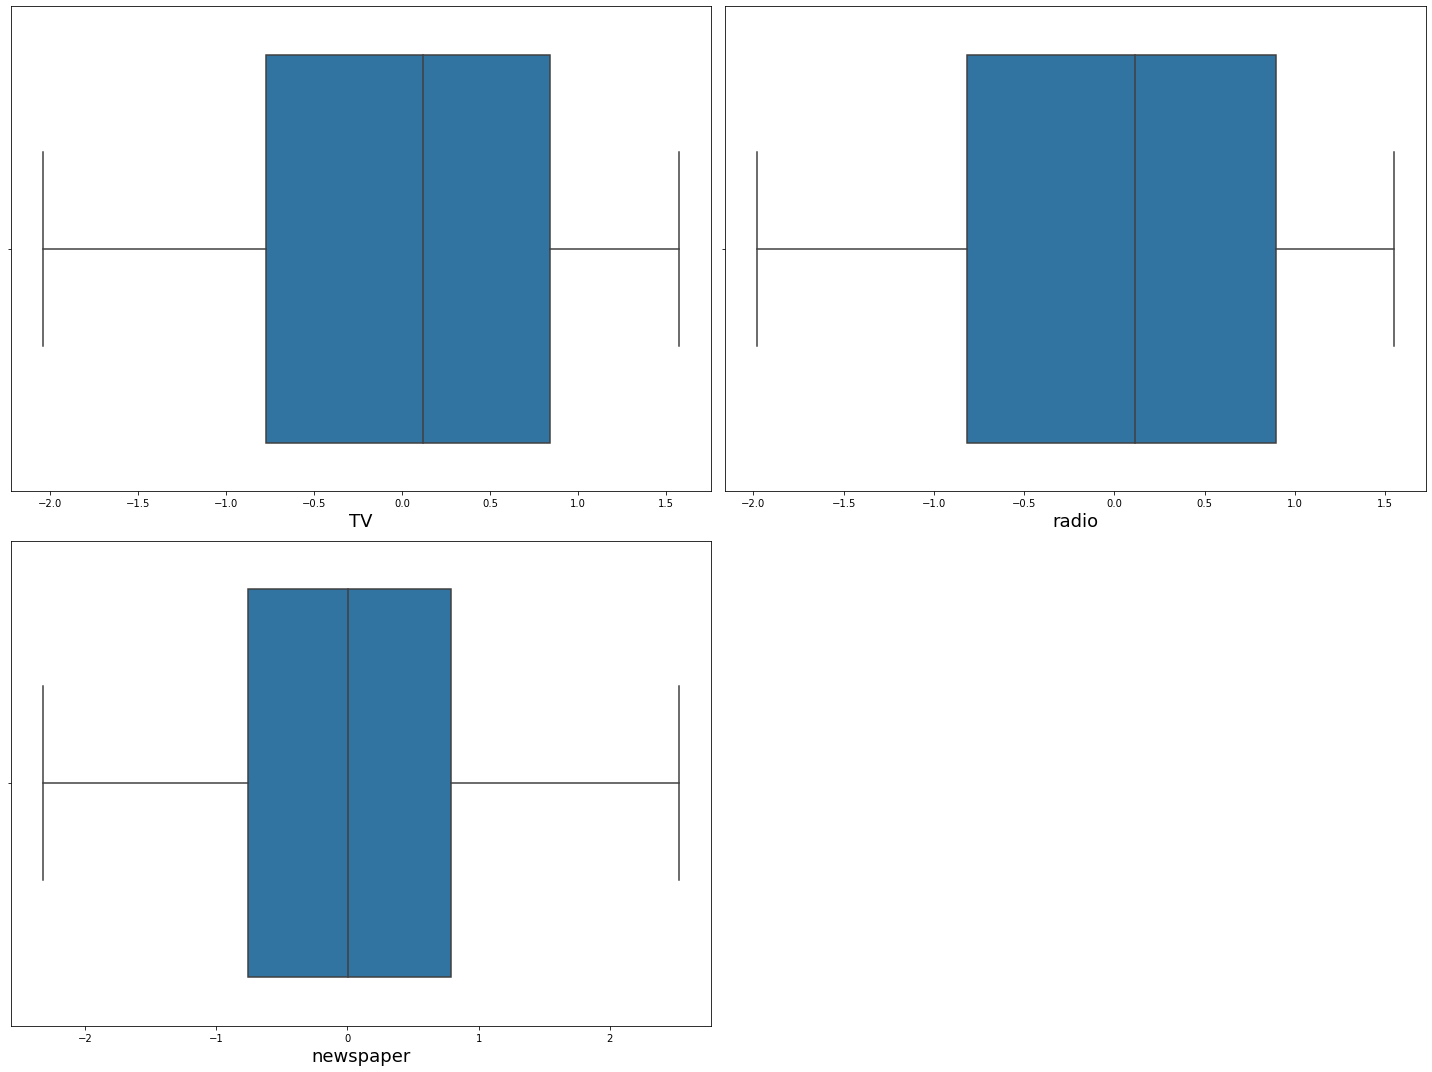

In [20]:
# Let' see how data is distributed in every columns.
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in X_new:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(X_new[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [21]:
# we observed that skweness and outlier is removed in over data set

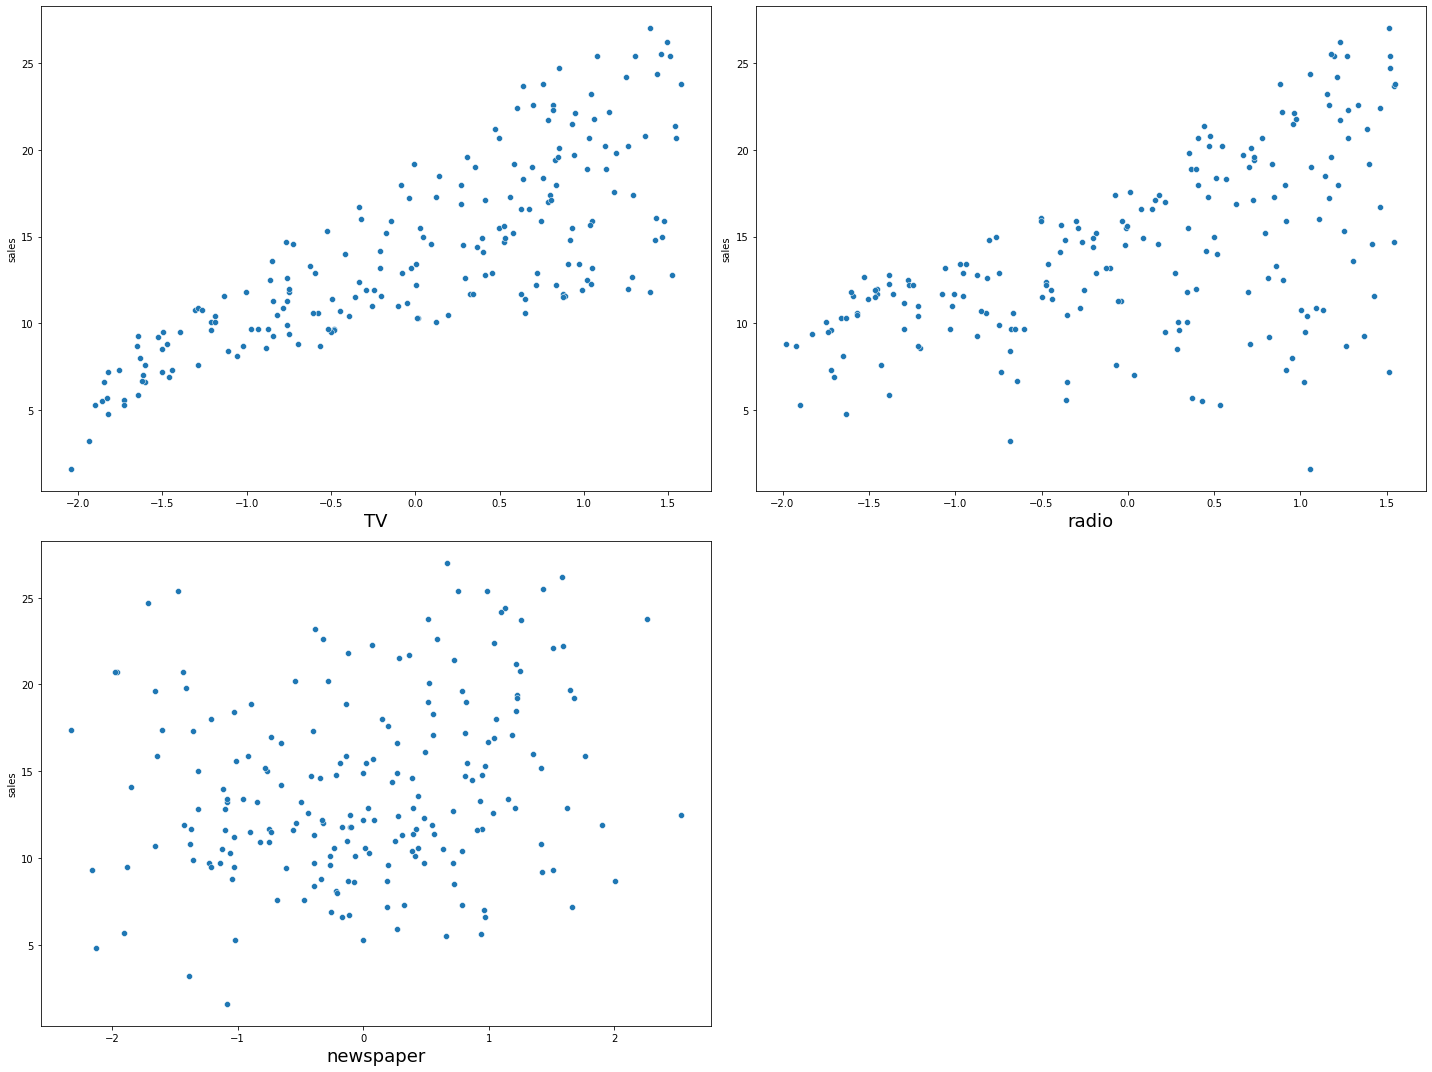

In [22]:
# visualize the relationship between the features and the response using scatterplots
# Let' see how data is distributed in every columns.
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in X_new:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.scatterplot(X_new[column],y)
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

we observed that tv and radio as linear realtionship

In [23]:
# Now we split our dataset into train and test

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(X_new)

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =41 )

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

lm_score = r2_score(y_test,y_pred)
print('R2 Score ----->',lm_score)

lm_test_score = lm.score(x_test, y_test)
print('Test Score ----->',lm_test_score)

lm_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',lm_mse)

lm_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',lm_rmse)


# print intercept and coefficients
print("intercept point is ----",lm.intercept_)
print("coefficients angle is ---- ",lm.coef_)

R2 Score -----> 0.8962913252219633
Test Score -----> 0.8962913252219633
mean_squared_error -----> 3.2329598841849325
Root Mean square Error -----> 1.7980433488058436
intercept point is ---- 2.740540271414872
coefficients angle is ----  [ 0.04613971  0.1929929  -0.00254098]


In [27]:
# Check model is overfitted or not
lm_csv = cross_val_score(LinearRegression(),X,y, cv=5).mean()
print('cross_validation_score ----->',lm_csv)

cross_validation_score -----> 0.8871063495438435


In [30]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

y_pred = dtr.predict(x_test)

dtr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',dtr_score)

dtr_test_score = dtr.score(x_test, y_test)
print('Test Score ----->',dtr_test_score)

dtr_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',dtr_mse)

dtr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',dtr_rmse)


R2 Score -----> 0.9660737224170959
Test Score -----> 0.9660737224170959
mean_squared_error -----> 1.0576
Root Mean square Error -----> 1.0283968105745953


In [31]:
# Check model is overfitted or not
dtr_csv = cross_val_score(DecisionTreeRegressor(),X,y, cv=5).mean()
print('cross_validation_score ----->',dtr_csv)


cross_validation_score -----> 0.956588738231073


In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

y_pred = knn.predict(x_test)

knn_score = r2_score(y_test,y_pred)
print('R2 Score ----->',knn_score)

knn_test_score = knn.score(x_test, y_test)
print('Test Score ----->',knn_test_score)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',knn_mse)

knn_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',knn_rmse)


R2 Score -----> 0.8765594186544997
Test Score -----> 0.8765594186544997
mean_squared_error -----> 3.848072
Root Mean square Error -----> 1.9616503256187123


In [33]:
# Check model is overfitted or not
knn_csv = cross_val_score(KNeighborsRegressor(),X,y, cv=5).mean()
print('cross_validation_score ----->',knn_csv)


cross_validation_score -----> 0.9085710686189529


In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

rfr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',knn_score)

rfr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',rfr_rmse)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',rfr_rmse)

test_score = rfr.score(x_test, y_test)
print('Test Score ----->',test_score)



R2 Score -----> 0.8765594186544997
Root Mean square Error -----> 0.8021503475035071
mean_squared_error -----> 0.8021503475035071
Test Score -----> 0.9793592097333003


In [35]:
# Check model is overfitted or not
rfr_csv = cross_val_score(RandomForestRegressor(),X,y,cv=5).mean()
print('cross_validation_score ----->',rfr_csv)

cross_validation_score -----> 0.9752403767142017


In [36]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)


svr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',svr_score)

svr_test_score = svr.score(x_test, y_test)
print('Test Score ----->',svr_test_score)

svr_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',svr_mse)

svr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',svr_rmse)




R2 Score -----> 0.8516819072797588
Test Score -----> 0.8516819072797588
mean_squared_error -----> 4.623590503780216
Root Mean square Error -----> 2.1502535905748923


In [37]:
# Check model is overfitted or not
svr_csv = cross_val_score(SVR(),X,y, cv=5).mean()
print('cross_validation_score ----->',svr_csv)

cross_validation_score -----> 0.8404415171122854


In [38]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [39]:
# find best alpha
alpha = lasscv.alpha_
alpha

0.00477353955397117

In [40]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00477353955397117)

In [41]:
lasso_score = lasso_reg.score(x_test, y_test)
lasso_score

0.8962998092356134

In [42]:
# Check model is overfitted or not
lasso_csv = cross_val_score(lasso_reg,X,y, cv=5).mean()
print('cross_validation_score ----->',lasso_csv)

cross_validation_score -----> 0.8871133080270447


In [43]:
# Using RidgeCV
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.1571810918146288

In [44]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
ridge_score = ridge_model.score(x_test, y_test)
print('ridge_score', ridge_score)

ridge_score 0.8962915851054979


In [45]:
# Check model is overfitted or not
ridge_csv = cross_val_score(ridge_model,X,y, cv=5).mean()
print('cross_validation_score ----->',ridge_csv)

cross_validation_score -----> 0.887106416884033


In [46]:
s = [lm_csv,dtr_csv,rfr_csv,svr_csv,knn_csv,lasso_csv,ridge_csv]
s

[0.8871063495438435,
 0.956588738231073,
 0.9752403767142017,
 0.8404415171122854,
 0.9085710686189529,
 0.8871133080270447,
 0.887106416884033]

In [47]:
models = pd.DataFrame({'Classifier':['Linear Regression', 'KNN', 'Decision Tree','Random Forest','Support Vector Machines', 'lasscv',
               'ridge_model'],
                      'Score':[lm_score,knn_score,dtr_score,rfr_score,svr_score,lasso_score,ridge_score],'CVS':[lm_csv,dtr_csv,rfr_csv,svr_csv,knn_csv,lasso_csv,ridge_csv]
})
models.sort_values(by='Score',ascending=False)

,Classifier,Score,CVS
3,Random Forest,0.979359,0.840442
2,Decision Tree,0.966074,0.975240
5,lasscv,0.896300,0.887113
6,ridge_model,0.896292,0.887106
0,Linear Regression,0.896291,0.887106
1,KNN,0.876559,0.956589
4,Support Vector Machines,0.851682,0.908571


# Conclusion : we  Linear Regression Model has 89% score  and also give least difference


Now we go for Hyperparameter Tunning

In [48]:
param_grid = {'fit_intercept' : [True, False],'normalize' : [True, False],'copy_X':[True, False],
             'positive':[True, False]}

In [49]:
grid_search = GridSearchCV(LinearRegression(), param_grid = param_grid, cv = 5,n_jobs = -1 )

In [50]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [51]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}

In [52]:
regression = LinearRegression(copy_X = True, fit_intercept = True, normalize = True, positive = True)
regression.fit(x_train, y_train)
reg_score = regression.score(x_train, y_train)
print('Training_score',reg_score)

Training_score 0.8965507637961573


In [53]:
y_pred = regression.predict(x_test)

regression_score = r2_score(y_test,y_pred)
print('R2 Score ----->',regression_score)

regression_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',regression_rmse)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',regression_rmse)

test_score = regression.score(x_test, y_test)
print('Test Score ----->',test_score)

R2 Score -----> 0.896584984968296
Root Mean square Error -----> 1.7954958894774624
mean_squared_error -----> 1.7954958894774624
Test Score -----> 0.896584984968296


In [54]:
#Saving The Model
import joblib
joblib.dump(regression,"Advertising Sales Channel Prediction.csv'.pkl")

["Advertising Sales Channel Prediction.csv'.pkl"]

we conclude that Linear Regression model Hyperparemeter Tyunning give 89% score 